<a href="https://colab.research.google.com/github/tawaqalt/tawaqalt/blob/main/Student_Mental_health_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Student Mental Health Analysis**

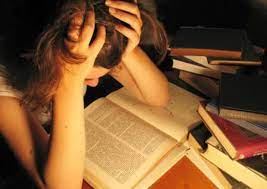

## **Introduction:**

In the realm of student well-being and academic success, the dataset obtained from Kaggle emerges as a comprehensive repository, capturing essential aspects of students' lives. This dataset encapsulates pivotal variables, including age, Cumulative Grade Point Average (CGPA), marital status, and an exploration into the nuanced dimension of depression status. As we embark on this analysis, the dataset becomes a lens through which we can unravel the intricate interplay of personal, academic, and mental health factors shaping the student experience.

Key Features of the Dataset:

Age Distribution:
Uncover the diverse age spectrum within the student community, examining how age may correlate with academic achievements and well-being.
Academic Performance (CGPA):

Dive into the academic journey of students by exploring their CGPA, providing insights into overall academic achievements and potential areas for improvement.
Marital Status:

Investigate the impact of marital status on the student experience, considering how personal relationships may intersect with academic pursuits and well-being.
Depression Status:

Delve into the sensitive yet critical dimension of mental health by examining the depression status of students. This exploration aims to shed light on the prevalence of depression and its potential association with academic performance and other variables.


## **Objective of the Analysis:**

Through this analysis, we aim to discern patterns and correlations that can inform targeted interventions and support systems for students. Understanding how age, CGPA, marital status, and depression status intertwine provides a holistic perspective, fostering a deeper appreciation of the challenges and triumphs that students may face during their educational journey.

As we navigate this dataset, the goal is to contribute meaningful insights that not only enhance our understanding of student dynamics but also lay the groundwork for developing tailored strategies to support student well-being and academic success.



# Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading the dataset

In [87]:
df = pd.read_csv('/content/Student Mental health.csv')

# Data Preprocessing

In [88]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [89]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [91]:
df.shape

(101, 11)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [92]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [93]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [94]:
df.duplicated().sum()

0

# **Data Cleaning and Transformation**

There is only one null value in the dataset so dropping it won't affect our analysis. However, there are discrepancies in the data type of some columns, so we need to convert them to the correct data type. It is important also to change the column names to make them more user-friendly and readable.

## Dropping the null values

In [95]:
df =df.dropna()

In [96]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

# Changing the column names

In [106]:
df_new_column_names = {'Timestamp': 'Date',
                       'Choose your gender': 'Gender',
                       'Age': 'Age',
                       'What is your course?': 'Major',
                       'Your current year of Study': 'Year of Study',
                       'What is your CGPA?': 'CGPA',
                       'Do you have Depression?': 'Depression',
                       'Do you have Anxiety?': 'Anxiety',
                       'Do you have Panic attack?': 'Panic Attacks',
                       'Did you seek any specialist for a treatment?': 'Treatment from a Specialist'}

df.rename(columns=df_new_column_names, inplace=True)


# Converting to the Proper Data Types



In [98]:
df['Age'] = df['Age'].astype(int)

In [99]:
df['CGPA'] = df['CGPA'].astype(str)

# Function to handle ranges by taking the average
def convert_gpa(value):
    if '-' in value:
        start, end = map(float, value.split(' - '))
        return round((start + end) / 2, 2)
    else:
        return round(float(value), 2)

# Apply the function to the 'GPA' column
df['CGPA'] = df['CGPA'].apply(convert_gpa).astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Date                                          100 non-null    object 
 1   Gender                                        100 non-null    object 
 2   Age                                           100 non-null    int64  
 3   Major                                         100 non-null    object 
 4   Year of Study                                 100 non-null    object 
 5   CGPA                                          100 non-null    float64
 6   Marital status                                100 non-null    object 
 7   Depression                                    100 non-null    object 
 8   Anxiety                                       100 non-null    object 
 9   Panic Attacks                                 100 non-null    obj

The date stamp is not useful for our analysis, so we will drop it.

In [25]:
df = df.drop(['Date'], axis = 1)

In [26]:
df['Major'] = df['Major'].replace({'Engineering': 'Engineering', 'Islamic education': 'Islamic education', 'BIT': 'Computer Science','Laws': 'Law', 'Pendidikan islam': 'Islamic Education', 'BCS':'Computer Science', 'Irkhs': 'Others','Psychology': 'Medical', 'KENMS':'Others', 'Accounting ':'Finance','ENM':'Others', 'KOE':'Others', 'Banking Studies':'Finance', 'Business Administration': 'Finance', 'KIRKHS': 'Others', 'Usuluddin ': 'Islamic Studies', 'TAASL':'Others','Engine':'Engineering','ALA': 'Others','Biomedical science':'Medical', 'koe':'Others', 'Kirkhs':'Others', 'BENL':'Others','Benl':'Others', 'IT': 'Computer Science', 'CTS': 'Computer Science', 'Biotechnology':'Medical', 'engin':'Engineering','Econs':'Finance', 'MHSC':'Others', 'Malcom':'Others', 'Kop':'Others',  'Biotechnology':'Medical', 'Communication ':'Computer Science','Diploma Nursing':'Medical', 'Pendidikan Islam ':'Islamic Education', 'Radiography':'Medical','psychology':'Medical', 'Fiqh fatwa ':'Islamic Education', 'DIPLOMA TESL': 'Others','Koe':'Others', 'Fiqh':'Islamic Education', 'Nursing ':'Medical','Pendidikan Islam':'Others'    })

In [27]:
df['Major'].unique()

array(['Engineering', 'Islamic education', 'Computer Science', 'Law',
       'Mathemathics', 'Islamic Education', 'Human Resources', 'Others',
       'Medical', 'Finance', 'Marine science', 'Islamic Studies',
       'Human Sciences '], dtype=object)

In [28]:
df['Year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [29]:
df['Year of Study'].replace({'year 1': 'year 1', 'year 2': 'year 2', 'Year 1': 'year 1', 'year 3': 'year 3', 'year 4': 'year 4', 'Year 2': 'year 2',
       'Year 3': 'year 3'}, inplace = True)

In [30]:
df['Year of Study'].unique()

array(['year 1', 'year 2', 'year 3', 'year 4'], dtype=object)

In [108]:
df.head()

,Date,Gender,Age,Major,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic Attacks,Treatment from Speacialist
0,8/7/2020 12:02,Female,18,Engineering,year 1,3.25,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21,Islamic education,year 2,3.25,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19,BIT,Year 1,3.25,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22,Laws,year 3,3.25,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23,Mathemathics,year 4,3.25,No,No,No,No,No


In [32]:
df.describe()

,Age,CGPA
count,100.00000,100.00000
mean,20.53000,3.38220
std,2.49628,0.53725
min,18.00000,0.99000
25%,18.00000,3.25000
50%,19.00000,3.25000
75%,23.00000,3.75000
max,24.00000,3.75000


the descriptive statistics show that the majority of students are between the age of 18 and 22, the median age is 20, and the mean of the cgpa is 3.3.

## **Data Visualization**

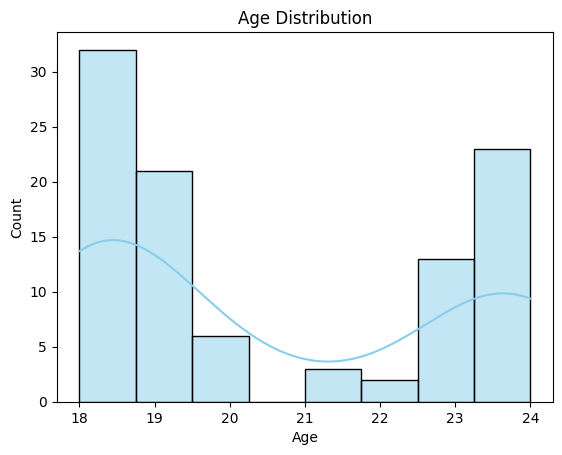

In [68]:
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Insight: the visualization shows that the majority of students fall in the age range 18-19 and 23-24.



# Distribution of Male and Female Students


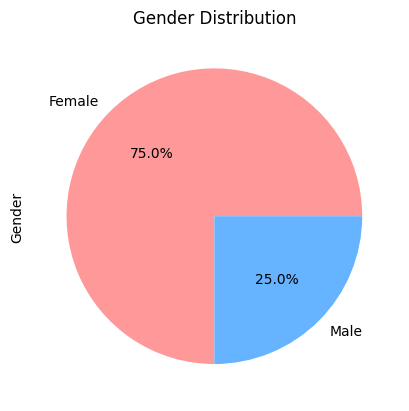

In [38]:
df.Gender.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Gender Distribution')
plt.show()

Insight: there is a significant proportion of female students compared to male students.

## What is the Age Distribution Amongst Different Academic Levels




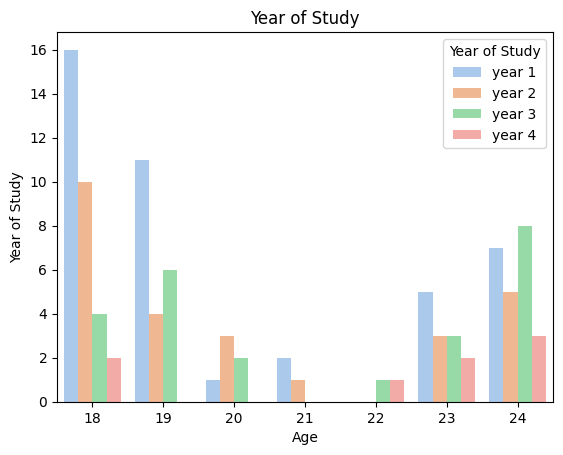

In [39]:
sns.countplot(x='Age', hue='Year of Study', data=df, palette='pastel')
plt.title('Year of Study')
plt.xlabel('Age')
plt.ylabel('Year of Study')
plt.show()

The visualization highlights that a significant proportion of students are enrolled in their first year of study. Notably, within the age range of 19-20, there is an absence of students in both their first and final years. This observation suggests a concentration of students in the early years of their academic journey, with a unique distribution pattern in the specified age bracket.

## Are there specific attributes or interests within age groups that drive their choice of disciplines?

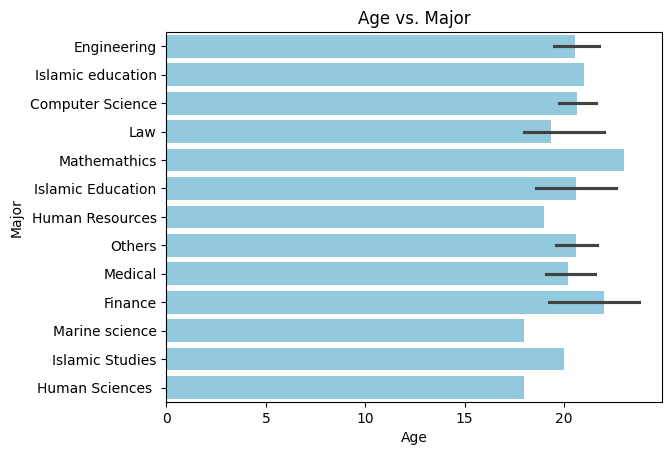

In [40]:
sns.barplot(x='Age', y='Major', data=df, color='skyblue')
plt.title('Age vs. Major')
plt.xlabel('Age')
plt.ylabel('Major')
plt.show()


Insights: the majority of students under the age of 20 are predominantly pursuing disciplines such as Engineering, Law, Marine Science, and Human Science. This concentration suggests a distinct academic preference among this age group, highlighting the prevalence of these specific majors within the younger student demographic

## Distribution of Marital Status

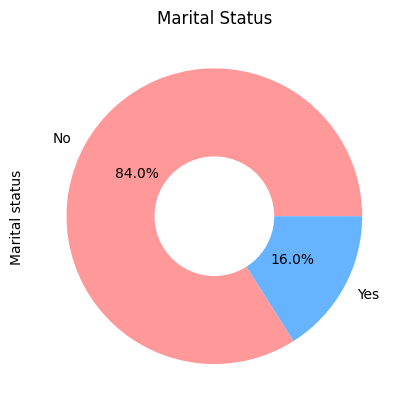

In [41]:
df['Marital status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.title('Marital Status')
plt.show()


Insight: The data reveals that 16% of the students are married, while the majority, accounting for 84%, are single. This distribution is attributed to the demographic composition of the surveyed students, with a significant portion being teenagers or in their early twenties.

## Does Marital Status have an impact on CGPA?

<ipython-input-42-230dfc91d265>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Marital status', y='CGPA', data=df, palette='pastel')


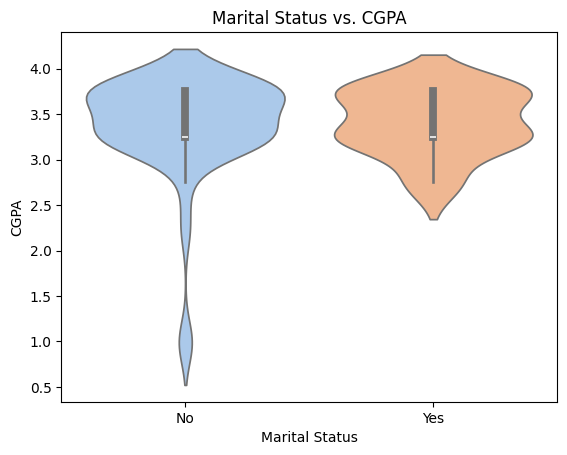

In [42]:
sns.violinplot(x='Marital status', y='CGPA', data=df, palette='pastel')
plt.title('Marital Status vs. CGPA')
plt.xlabel('Marital Status')
plt.ylabel('CGPA')
plt.show()


Insight: This observation suggests that married students tend to have a higher CGPA than their single counterparts. This phenomenon could potentially be linked to the presence of emotional support among married students, highlighting the impact of interpersonal relationships on academic performance.

## What is the Distribtuion of Depressed and Not Depressed?

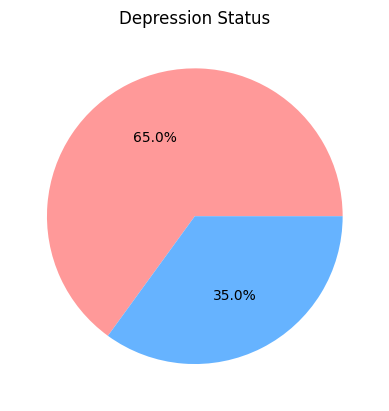

In [50]:
plt.pie(df['Depression'].value_counts(), autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Depression Status')
plt.show()

Insight: The data reveals that 37% of the students are depressed, while the majority, accounting for 63%, are not depressed.

## Does being Marrried have an impact on Depressionn Status:

In [43]:
df_depression = df[df['Depression'] == 'Yes']

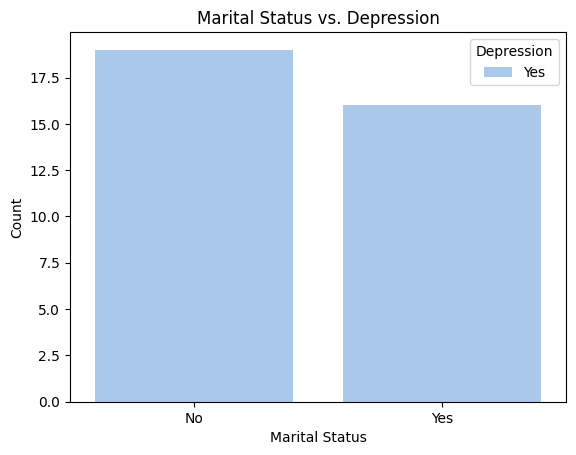

In [44]:
sns.countplot(x='Marital status', hue='Depression', data=df_depression, palette='pastel')
plt.title('Marital Status vs. Depression')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

Insight: The visualization underscores a notable trend: a lower proportion of married students experience depression compared to their single counterparts. This intriguing observation prompts further exploration into potential factors influencing mental health outcomes based on marital status among the surveyed students.

## Correlation between Marital status and CGPA

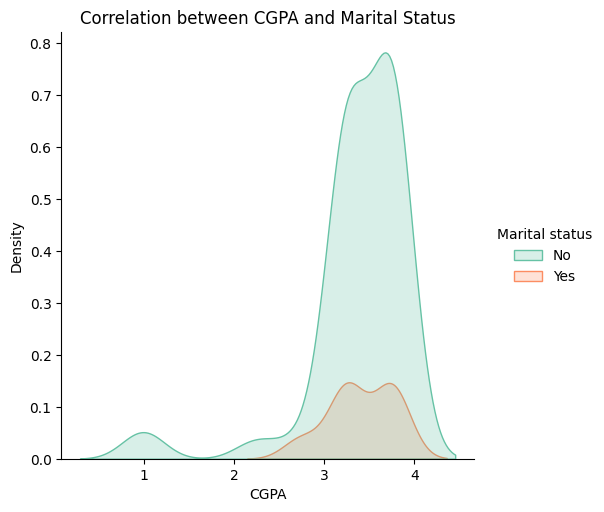

In [122]:
sns.displot(data=df, x='CGPA', hue='Marital status', palette='Set2', kind='kde', fill=True)
plt.title('Correlation between CGPA and Marital Status')
plt.show()

Insight: The visualization reveals a significant correlation between Marital Status and CGPA. The positive correlation suggests that students who are married tend to have higher CGPA.

# Does a lower CGPA correlate with a higher likelihood of experiencing panic attacks and depression among students?



Text(0.5, 1.0, 'Correlation between CGPA and Panic Attacks')

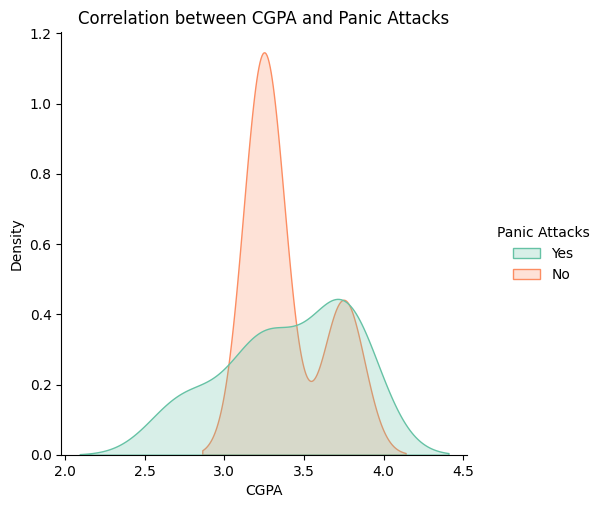

In [45]:
sns.displot(data=df_depression, x='CGPA', hue='Panic Attacks', palette='Set2', kind='kde', fill=True)
plt.title('Correlation between CGPA and Panic Attacks')

The visualization reveals a significant correlation between Panic Attacks and CGPA. The positive correlation suggests that students who have a lower CGPA are more likely to experience panic attacks.

## What is the Distribution of Depresssion across different ages?


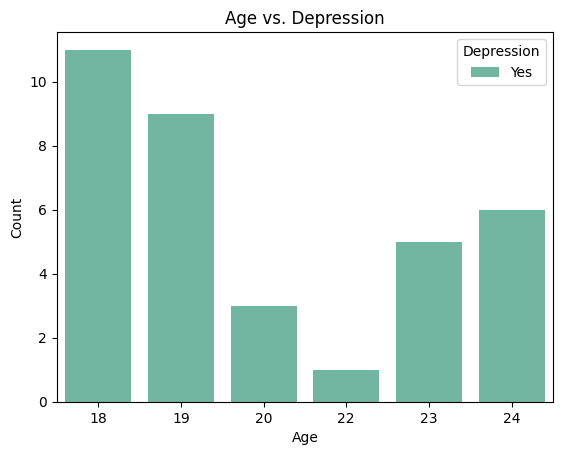

In [72]:
sns.countplot(x='Age', hue='Depression', data=df_depression, palette='Set2')
plt.title('Age vs. Depression')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Insights: The students in the age range of 18-19 exhibit a high prevalence of depression compared to their counterparts in the age range of 20-21. this could be because the students are in a new environmnet they have not experienced before. and adapting can be challenging.

## Does having a lower CGPA correlate with a higher likelihood of experiencing depression among students?

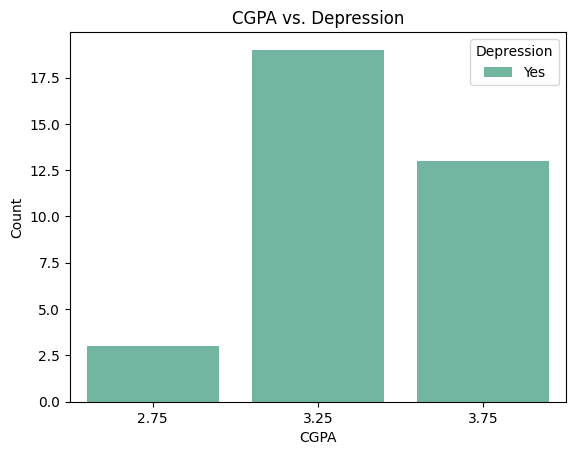

In [70]:
sns.countplot(x='CGPA', hue='Depression', data=df_depression, palette='Set2')
plt.title('CGPA vs. Depression')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

Insights:Observation: Students with a CGPA of 3.25 exhibit a higher prevalence of depression in comparison to their counterparts with CGPAs of 2.75 and 3.75.

# Does the Year of Study have an impact on anxiety levels?

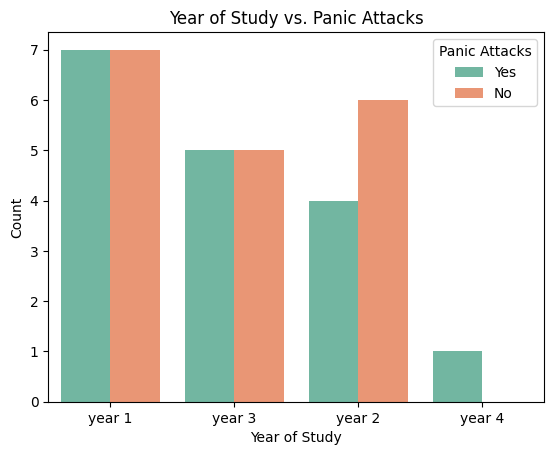

In [82]:
sns.countplot(x='Year of Study', hue='Panic Attacks', data=df_depression, palette='Set2')
plt.title('Year of Study vs. Panic Attacks')
plt.xlabel('Year of Study')
plt.ylabel('Count')
plt.show()

Insights: The data discloses a higher prevalence of panic attacks among students in their second year, possibly stemming from increased self-awareness regarding the impact of their activities on their CGPA. Intriguingly, students in their final year exhibit no instances of panic attacks, suggesting a potential adaptation to the school environment and a heightened understanding of academic demands over the course of their university journey.

## How many students experiencing depression sought medical treatment from a specialist?"

Text(0.5, 1.0, 'Correlation between CGPA and Panic Attacks')

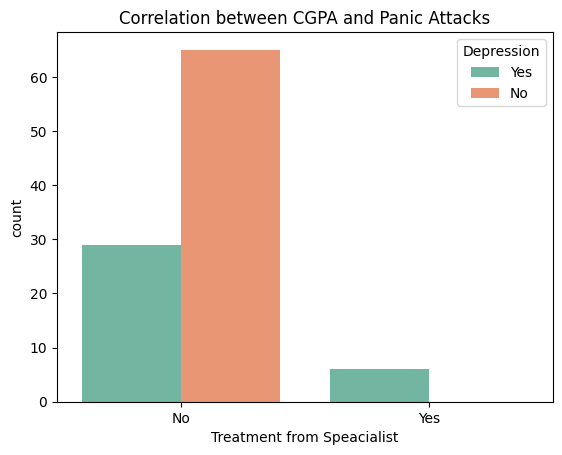

In [121]:
sns.countplot(data=df, x='Treatment from Speacialist', hue='Depression', palette='Set2', fill=True)
plt.title('Correlation between CGPA and Panic Attacks')

Insights: The visualization highlights a predominant trend where a significant portion of students who have encountered depression did not opt for medical treatment from a specialist. This pattern might be attributed to financial constraints, the absence of specialized professionals within the school, or a perception among students that seeking a specialist is unnecessary, and they can overcome their challenges without expert intervention.






## **Conclusion:**

* Despite the overall lower percentage (about 35%) of students who experienced depression, there is a noteworthy finding that students with a CGPA of 3.25 demonstrate a higher prevalence of depression compared to those with CGPAs of 2.75 and 3.75. This prompts further exploration into factors contributing to the heightened incidence of depression among students with a CGPA of 3.25.

* An interesting pattern emerges regarding panic attacks, where individuals in their second year of study exhibit instances of panic attacks. This observation raises questions about potential stressors or challenges specific to the second year of academic pursuits that may influence the occurrence of panic attacks.

* Contrary to expectations, single students exhibit instances of both panic attacks and depression compared to their married counterparts. This observation challenges assumptions about the perceived support systems in marital relationships and suggests a need for a nuanced exploration of the factors influencing mental health across different relationship statuses.

* A concerning observation is that all the students who experienced depression did not seek medical treatment. This highlights a potential gap in mental health support systems, raising questions about the accessibility of mental health resources on campus and the need for interventions to encourage seeking professional help among affected students.

### **Recommendation:**

* Implement Mental Health Awareness Programs:
Develop and implement mental health awareness programs aimed at reducing the stigma associated with seeking help. Promote a campus culture that encourages open discussions about mental health, ensuring students are aware of available resources and support services.

* Enhance Academic Support for CGPA of 3.25:
Recognizing the higher prevalence of depression among students with a CGPA of 3.25, consider implementing targeted academic support programs. These initiatives could include study skills workshops, counseling services, and mentorship programs to address potential academic stressors.

* Tailor Support for Second-Year Students:
Given the observed instances of panic attacks in second-year students, consider designing interventions specifically tailored to address the challenges commonly faced during the second year of study. These could include stress management workshops, peer support programs, or academic counseling services.

* Provide Comprehensive Mental Health Resources:
Ensure the availability and accessibility of comprehensive mental health resources on campus. This includes counseling services, mental health workshops, and information on seeking professional help. Proactively communicate these resources to students through various channels.

* Explore Relationship Status Dynamics:
Investigate the factors contributing to instances of panic attacks and depression among single students compared to their married counterparts. This exploration could involve conducting surveys, focus groups, or interviews to better understand the unique challenges faced by students in different relationship statuses.

* Periodic Mental Health Check-ins:
Implement periodic mental health check-ins for students, providing opportunities for self-assessment and encouraging early intervention. These check-ins can be integrated into academic advising sessions or campus-wide campaigns focused on mental well-being.